# Biodata

**Fida Mardliyah // fidamardliyah11@gmail.com**

Sumber Data : https://www.kaggle.com/bulentsiyah/for-simple-exercises-time-series-forecasting?select=energydata_complete.csv

# Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
datats = pd.read_csv('energydata_complete.csv', index_col=0, parse_dates=True, squeeze=True)

In [3]:
datats.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
datats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  int64  
 1   lights       19735 non-null  int64  
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

In [5]:
datats.shape

(19735, 28)

# Preprocessing

## Missing Value

In [6]:
datats.isnull().sum()

Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [7]:
datats.Appliances = datats.Appliances.astype(float)
datats.lights = datats.lights.astype(float)

In [8]:
datats.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19735 entries, 2016-01-11 17:00:00 to 2016-05-27 18:00:00
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Appliances   19735 non-null  float64
 1   lights       19735 non-null  float64
 2   T1           19735 non-null  float64
 3   RH_1         19735 non-null  float64
 4   T2           19735 non-null  float64
 5   RH_2         19735 non-null  float64
 6   T3           19735 non-null  float64
 7   RH_3         19735 non-null  float64
 8   T4           19735 non-null  float64
 9   RH_4         19735 non-null  float64
 10  T5           19735 non-null  float64
 11  RH_5         19735 non-null  float64
 12  T6           19735 non-null  float64
 13  RH_6         19735 non-null  float64
 14  T7           19735 non-null  float64
 15  RH_7         19735 non-null  float64
 16  T8           19735 non-null  float64
 17  RH_8         19735 non-null  float64
 18  T9         

# Plot Awal

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set(rc={'figure.figsize':(30,15)})

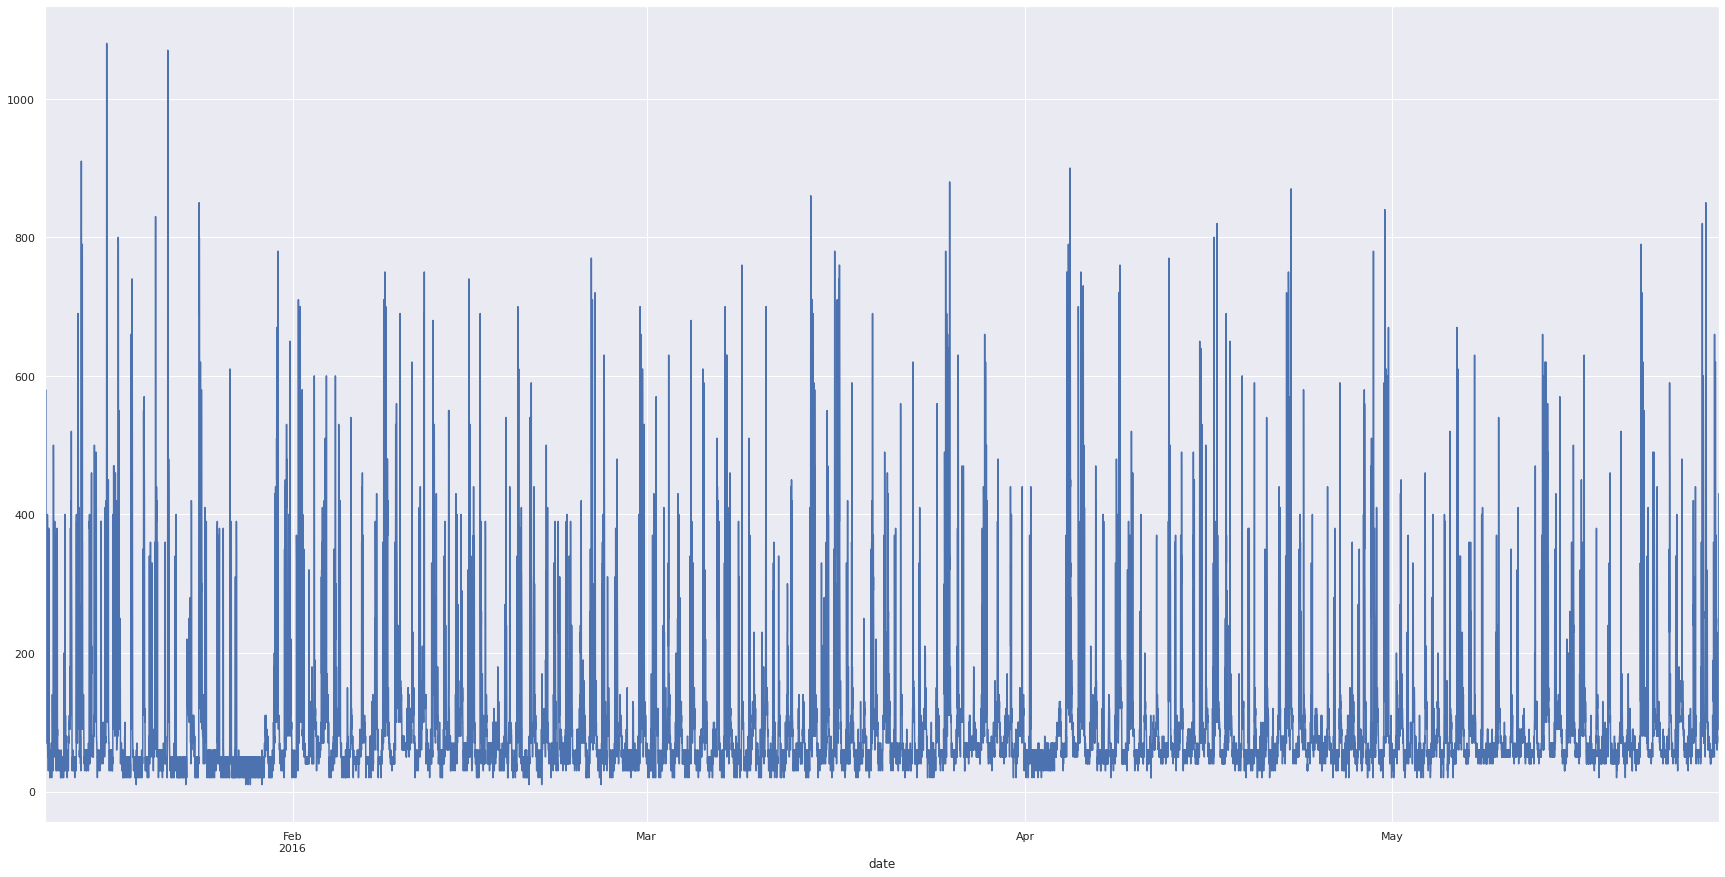

In [11]:
datats['Appliances'].plot(linewidth=1.5);

# Split Data

In [13]:
energy  = datats['Appliances'].values

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_val, = train_test_split(energy, test_size=0.2, shuffle=False)

In [15]:
print('Jumlah Train: ', len(x_train))
print('Jumlah Validasi: ', len(x_val))

Jumlah Train:  15788
Jumlah Validasi:  3947


# Modelling

## Batch

In [16]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

## LSTM & Sequential

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [20]:
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=1000)
val_set = windowed_dataset(x_val, window_size=60, batch_size=100, shuffle_buffer=1000)
model = Sequential([
  Bidirectional(LSTM(60, return_sequences=True)),
  Bidirectional(LSTM(60)),
  Dropout(0.5),
  Dense(30, activation="relu"),
  Dense(10, activation="relu"),
  Dense(1),
])

## Rumus MAE

In [21]:
Mae = abs((datats['Appliances'].max() - datats['Appliances'].min()) * 10/100)
print(Mae)

107.0


## Callbacks

In [22]:
class mycb(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<107.0 and logs.get('val_mae')<107.0):
      print('\nMAE has reach < 10% from data scale'),
      self.model.stop_training = True

## Compile Optimizer

In [23]:
optimizer = tf.keras.optimizers.SGD(lr=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Fit Training

In [30]:
fitmodel = model.fit(train_set, steps_per_epoch = 25, epochs = 100, 
                     validation_data = val_set, validation_steps=5,
                    callbacks = [mycb()]
                     )

Epoch 1/100
25/25 [==============================] - 6s 229ms/step - loss: 89.5540 - mae: 90.0540 - val_loss: 75.6419 - val_mae: 76.1419

MAE has reach < 10% from data scale


# Perbandingan Plot

dikarenakan pada Epoch 1 nilai MAE < 10% dari skala data maka tidak dapat membuat plot perbandingan akurasi dan loss.